In [128]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import sys; sys.path.append('../Utils')
import utils from Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
df = pd.read_csv('../data/CTGsmt.csv', header=None)
data = df.to_numpy()
# Features matrix
X = data[:,0:22]
Y = data[:,23]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y, shuffle=True, test_size = 0.25)

In [130]:
ut = Utils()

TypeError: 'module' object is not callable

In [122]:
xx= ut.try_to_configure()
xx

'xxxxx'

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.259259,0.259259,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,0.047337,0.000000,...,0.110092,0.034483,0.111111,0.000000,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.481481,0.153846,0.000000,0.173913,0.066667,0.279412,0.000000,0.205128,0.125000,...,0.165138,0.655172,0.333333,0.100000,0.637795,0.577982,0.577982,0.044610,0.5,1.0
2,0.500000,0.500000,0.076923,0.000000,0.217391,0.053333,0.279412,0.000000,0.264300,0.125000,...,0.165138,0.655172,0.277778,0.100000,0.637795,0.568807,0.559633,0.048327,0.5,1.0
3,0.518519,0.518519,0.076923,0.000000,0.260870,0.053333,0.323529,0.000000,0.453649,0.125000,...,0.027523,0.413793,0.611111,0.000000,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.481481,0.153846,0.000000,0.217391,0.053333,0.323529,0.000000,0.392505,0.000000,...,0.027523,0.413793,0.500000,0.000000,0.606299,0.577982,0.559633,0.040892,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,0.777778,0.777778,0.000000,0.002050,0.016753,0.767217,0.014706,0.819942,0.089517,0.000000,...,0.743877,0.263920,0.102446,0.000000,0.708661,0.693713,0.675364,0.000000,1.0,3.0
4961,0.518519,0.518519,0.000000,0.004269,0.000000,0.914561,0.000000,0.555522,0.099061,0.000000,...,0.722899,0.198276,0.111111,0.000000,0.590551,0.568807,0.541284,0.003717,0.5,3.0
4962,0.425926,0.425926,0.000000,0.001773,0.303076,0.719610,0.382353,0.000000,0.000000,0.380483,...,0.000000,0.191420,0.334958,0.005849,0.354331,0.110360,0.303289,0.041110,0.5,3.0
4963,0.500000,0.500000,0.000000,0.001597,0.178238,0.640000,0.388204,0.000000,0.143872,0.118783,...,0.091743,0.370690,0.283304,0.000000,0.309478,0.225708,0.270667,0.166177,0.5,3.0


In [4]:
clf = QuadraticDiscriminantAnalysis()
y_score = clf.fit(X_train, y_train).decision_function(X_test)

/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [5]:
# Gmean
Yest = clf.predict(X_test)
gmean = geometric_mean_score(y_true = y_test, y_pred=Yest, average="weighted")
gmean_ic = np.std(gmean)

In [6]:
# F1
f1 = f1_score(y_true = y_test, y_pred=Yest, average = "weighted")
f1_ic = np.std(f1)

In [13]:
# Eficiencia de entrenamiento
Ytrain_pred = clf.predict(X_train)


In [14]:
# Eficiencia de test
EficienciaVal = np.mean(Yest.ravel() == y_test.ravel())

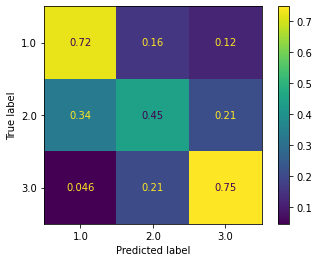

In [15]:
plot_confusion_matrix(clf,X=X_test, y_true=y_test,normalize='true')

In [16]:
df_types = pd.DataFrame({'Quadratic Analysis'})

In [17]:
df_types["F1_Score"] = f1
df_types["Gmean"]= gmean
df_types["Eficiencia Train"] = EficienciaTrain
df_types["Eficiencia Test"] = EficienciaVal

In [18]:
df_types

,0,F1_Score,Gmean,Eficiencia Train,Eficiencia Test
0,Quadratic Analysis,0.634444,0.72514,0.661832,0.640902


In [20]:
params = [0.1, 0.2, 0.3, 0.4, 0.5]
for param in params:
    print(str(param))

{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}


In [ ]:
def trainQDA(X, Y, param):
    # Folds = 4
    # X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y, shuffle=True, test_size = 0.25)
    skf = StratifiedKFold(n_splits=Folds)
    f1 = np.zeros(Folds)
    gmean = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    eficiencia_train = []
    eficiencia_test = []
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        clf = QuadraticDiscriminantAnalysis(param)
        Yest = clf.predict(Xtest)
        f1_score_current = f1_score(y_true = Ytest, y_pred=Yest, average = "weighted")
        f1.append(f1_score_current)
        gmean_current = geometric_mean_score(y_true = Ytest, y_pred=Yest, average="weighted")
        gmean.append(gmean_current)
        eficiencia_train_current = np.mean(Ytrain_pred.ravel() == y_train.ravel())
        eficiencia_train.append(eficiencia_train_current)
        eficiencia_test_current = np.mean(Ytrain_pred.ravel() == y_train.ravel())
        eficiencia_test.append(eficiencia_train_current)
        
    
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    clf = QuadraticDiscriminantAnalysis()
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [ ]:
    for param in params: